## Libraries

In [1]:
import networkx as nx
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import ast

# allowing the plot in line for seaborn
%matplotlib inline
plt.style.use('seaborn')

# enabling outlines line in histogram 
plt.rcParams["patch.force_edgecolor"] = True

## Function

In [52]:
def save_img(title, name):    
    plt.savefig(f'/Users/villons/Desktop/echo-chamers/src/analysis_images/{name}/{title}.png', 
                dpi = 300, quality = 95, format = 'png', pad_inches = 1000)
    
def community_pie_chart(graph, comm_type, name, study):
    
    communities = dict()
    for node in graph.nodes(data=True):
        if not(f'Comunità: {node[1][comm_type]}' in communities):
            communities[f'Comunità: {node[1][comm_type]}'] = 1
        else:
            communities[f'Comunità: {node[1][comm_type]}'] += 1
            
            
    com = list(communities.keys())
    com_comp = list(communities.values())
    colors = ['#0045b5', '#b50000']
    if com[0] != 'Comunità: 1':
        com[0], com[1] = com[1], com[0]
        com_comp[0], com_comp[1] = com_comp[1], com_comp[0]

    print(communities)
    
    fig, ax = plt.subplots()
    ax.pie(com_comp, labels = com, explode = [0, 0.1], shadow=True,
        startangle = 90, colors = colors, wedgeprops={'edgecolor': 'black'})
    ax.set_title(f'Suddivisione community per {name}')
    save_img(f'Suddivisione community per {name}', study)
    plt.show() 
    
def plot_sentiment_distribution(compact_graph, name, sentiment_df):
    
    fig, ax = plt.subplots()
    ax = sns.distplot(sentiment_df['sentiment'], hist=False, label='Sentimento su intero grafo')
    title = f'Distribuzione sentiment su grafo {name}'
    ax.set_title(title)
    ax.set_xlabel('Score sentimento')
    ax.set_ylabel('Distribuzione probabilità')
    ax.legend()
    save_img(title, name)
    plt.show()
    
    columns = sentiment_df.columns[1:]
    
    titles = ['strutturale', 'sentiment', 'topic', 'hybrid']
    index = 0
    for column in columns:
        title = f'Distribuzione sentimento nelle communities dato approccio {titles[index]}'
        sentiment_df_weight_0 = sentiment_df.query(f'{column} == 0')
        sentiment_df_weight_1 = sentiment_df.query(f'{column} == 1')
        fig, ax = plt.subplots()
        ax = sns.distplot(sentiment_df_weight_0['sentiment'], hist=False, label='Sentimento nella community 0')
        ax = sns.distplot(sentiment_df_weight_1['sentiment'], hist=False, label='Sentimento nella community 1')
        ax.set_title(title)
        ax.set_xlabel('Score sentimento')
        ax.set_ylabel('Distribuzione probabilità')
        ax.legend()
        save_img(title, name)
        plt.show()
        index += 1
        
def create_graph_df(graph):
    graph_df = pd.DataFrame(columns=['sentiment', 'weightComm', 'sentimentComm', 'topicComm', 'hybridComm', 'tweetTopic'])
    for node in tqdm(graph.nodes(data=True)):
        new_row = [node[1]['sentiment'], node[1]['weightComm'], node[1]['sentimentComm'],
                   node[1]['topicComm'], node[1]['hybridComm'], node[1]['tweetTopic']]
        graph_df.loc[len(graph_df)] = new_row
    return graph_df

def add_to_dictionary(dictionary, key):
    if key in dictionary:
        dictionary[key] += 1
    else:
        dictionary[key] = 1
    return dictionary

def topic_distribution(graph_df, name):
    
    titles = ['strutturale', 'sentiment', 'topic', 'hybrid']
    cont = 0
    
    comm_types = list(graph_df.columns)[1:5]
    
    for comm_type in comm_types:
        topic_cont = dict()
        topic_cont_0 = dict()
        topic_cont_1 = dict()
        for _, row in graph_df.iterrows():
            topics = ast.literal_eval(row['tweetTopic'])
            community = row[f'{comm_type}']
            for topic in topics:
                topic_cont = add_to_dictionary(topic_cont, topic)
                if community == 0:
                    topic_cont_0 = add_to_dictionary(topic_cont_0, topic)
                else:
                    topic_cont_1 = add_to_dictionary(topic_cont_1, topic)
                    
                
        topic_cont = dict(sorted(topic_cont.items()))
        topic_cont_0 = dict(sorted(topic_cont_0.items()))
        topic_cont_1 = dict(sorted(topic_cont_1.items()))


        title = f'Distribuzione topic con approccio {titles[cont]}'

        width = 0.25
        fig, ax = plt.subplots()
        fig.set_size_inches(18.5, 10.5)
        x_indexes = np.arange(1, len(topic_cont)+1)
        ax.bar(x_indexes - width, topic_cont.values(), width = width, color = '#444444', label = 'Su tutto il grafo')
        ax.bar(x_indexes, topic_cont_0.values(), width = width, color = '#5a7d9a', label = 'Community 0')
        ax.bar(x_indexes + width, topic_cont_1.values(), width = width, color = '#adad3b', label = 'Community 1')
        plt.xticks(ticks=x_indexes, labels=x_indexes)
        ax.legend()
        ax.set_xlabel('ID dei topic')
        ax.set_ylabel('tweet associati ai topic')
        ax.set_title(title)
        
        cont += 1

        save_img(title, name)
        plt.show()

## Garimella


In [ ]:
os.chdir('/Users/villons/Desktop/echo-chamers/src/data/garimella_data')

In [ ]:
beefban = nx.read_gml('./Graph/beefban.gml')
ukraine = nx.read_gml('./Graph/ukraine.gml')
kissing_day = nx.read_gml('./Graph/nationalkissingday.gml')

#### Pie chart community membership

In [ ]:
community_pie_chart(beefban, 'weightComm', 'BeefBan con approccio strutturale', 'Garimella')
community_pie_chart(ukraine, 'weightComm', 'Ukraine con approccio strutturale', 'Garimella')
community_pie_chart(kissing_day, 'weightComm', 'Kissingday con approccio strutturale', 'Garimella')

## Covid-19

In [3]:
os.chdir('/Users/villons/Desktop/echo-chamers/src/data/corona_virus')

In [4]:
covid_compact = nx.read_gml('./Graph/Final_Graph_Covid.gml')
covid_complete = nx.read_gml('./Graph/Final_DiGraph_Covid.gml')
covid_metadata = nx.read_gml('./Graph/Final_DiGraph_Covid_data.gml')

In [5]:
covid_19_df = create_graph_df(covid_compact)

#### Pie chart community membership

In [ ]:
community_pie_chart(covid_compact, 'weightComm', 'COVID-19 con approccio strutturale', 'COVID-19')
community_pie_chart(covid_compact, 'sentimentComm', 'COVID-19 con approccio sentiment e strutturale', 'COVID-19')
community_pie_chart(covid_compact, 'topicComm', 'COVID-19 con approccio topic e strutturale', 'COVID-19')
community_pie_chart(covid_compact, 'hybridComm', 'COVID-19 con approccio ibrido', 'COVID-19')

#### Distribution plot different approach

In [ ]:
plot_sentiment_distribution(covid_compact, 'COVID-19', covid_19_df)

#### Topic talking

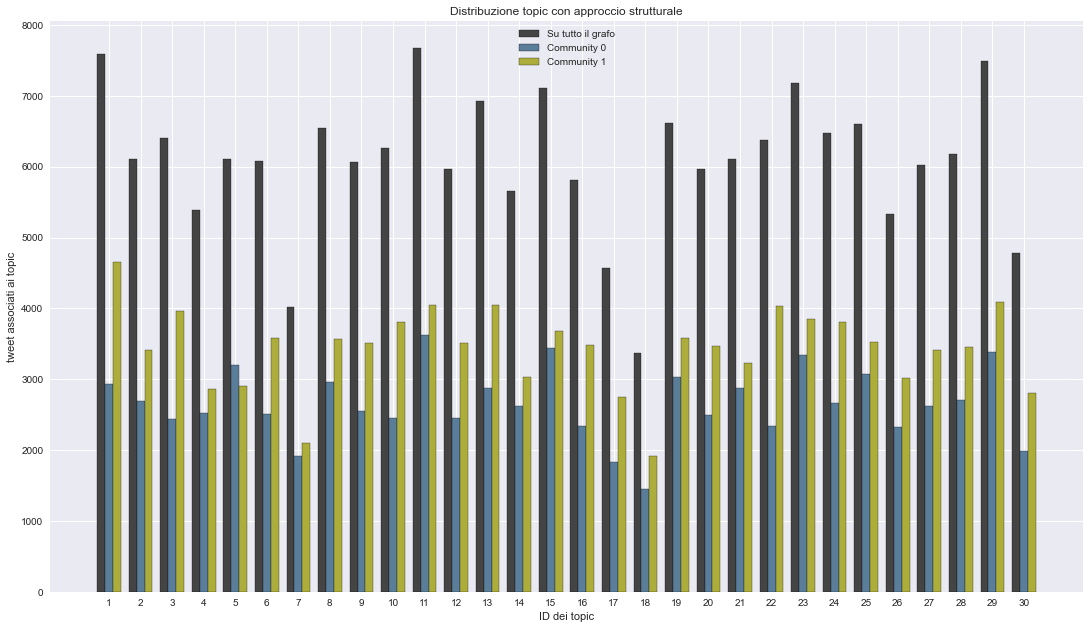

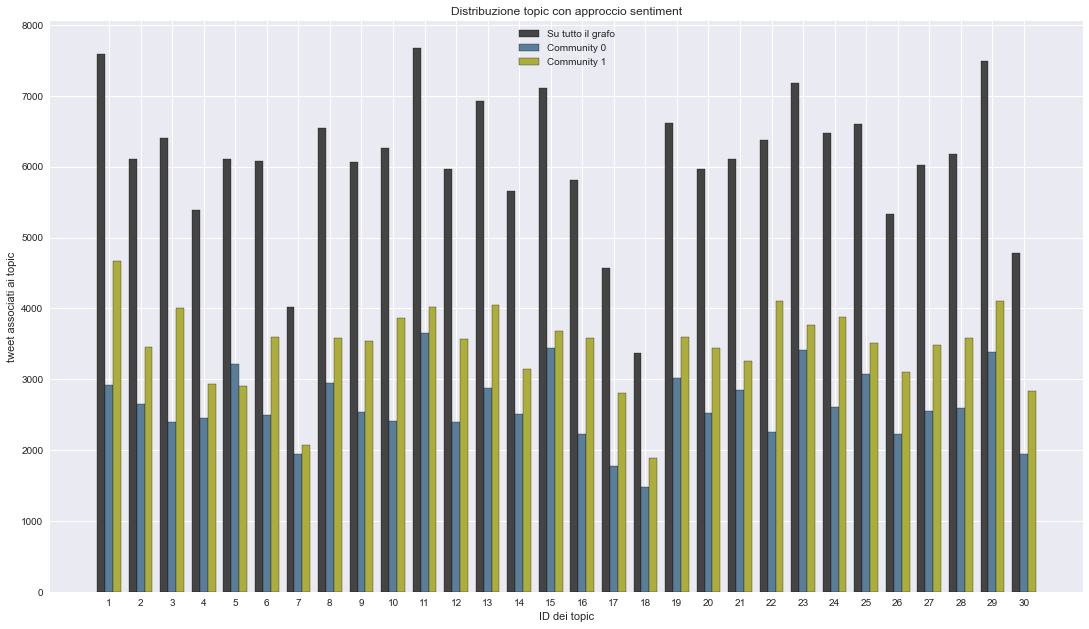

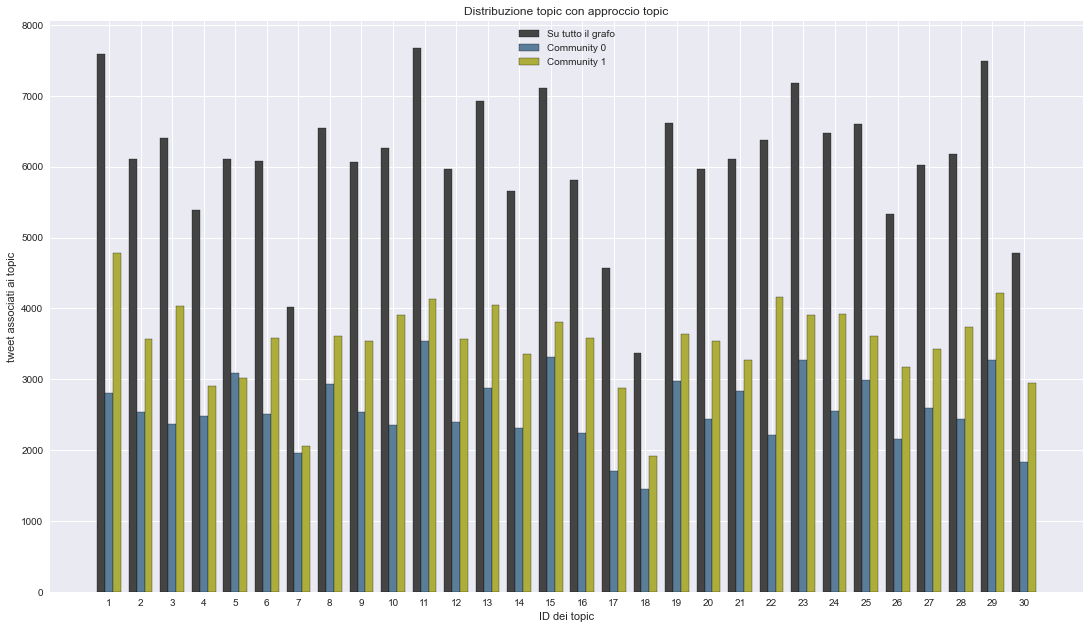

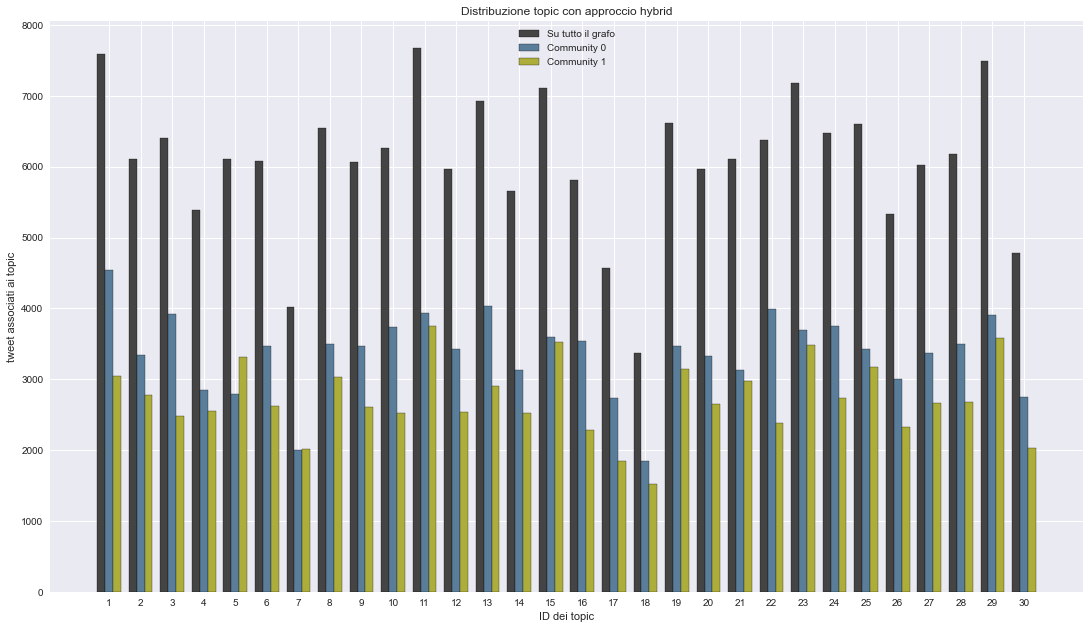

In [53]:
topic_distribution(covid_19_df, 'COVID-19')

## Vax

In [48]:
os.chdir('/Users/villons/Desktop/echo-chamers/src/data/vax_no_vax')

In [49]:
vax_compact = nx.read_gml('Graph/Final_Graph_vax.gml')
vax_complete = nx.read_gml('Graph/Final_DiGraph_Vax.gml')

In [50]:
vaccination_df = create_graph_df(vax_compact)

In [55]:
print(nx.info(vax_compact))

Name: Final vax Graph
Type: Graph
Number of nodes: 39604
Number of edges: 86848
Average degree:   4.3858


#### Pie chart community membership

In [ ]:
community_pie_chart(vax_compact, 'weightComm', 'Vaccinazioni con approccio strutturale', 'Vaccination')
community_pie_chart(vax_compact, 'sentimentComm', 'Vaccinazioni con approccio sentiment e strutturale', 'Vaccination')
community_pie_chart(vax_compact, 'topicComm', 'Vaccinazioni con approccio topic e strutturale', 'Vaccination')
community_pie_chart(vax_compact, 'hybridComm', 'Vaccinazioni con approccio ibrido', 'Vaccination')

#### Distribution plot different approach

In [ ]:
plot_sentiment_distribution(vax_compact, 'Vaccination')

#### Topic talking

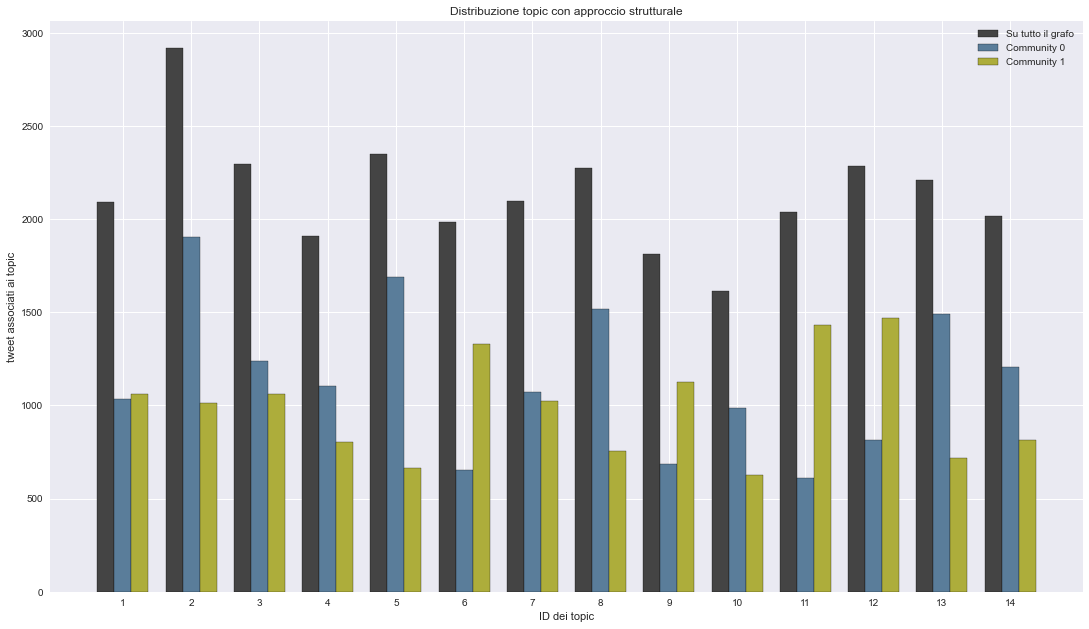

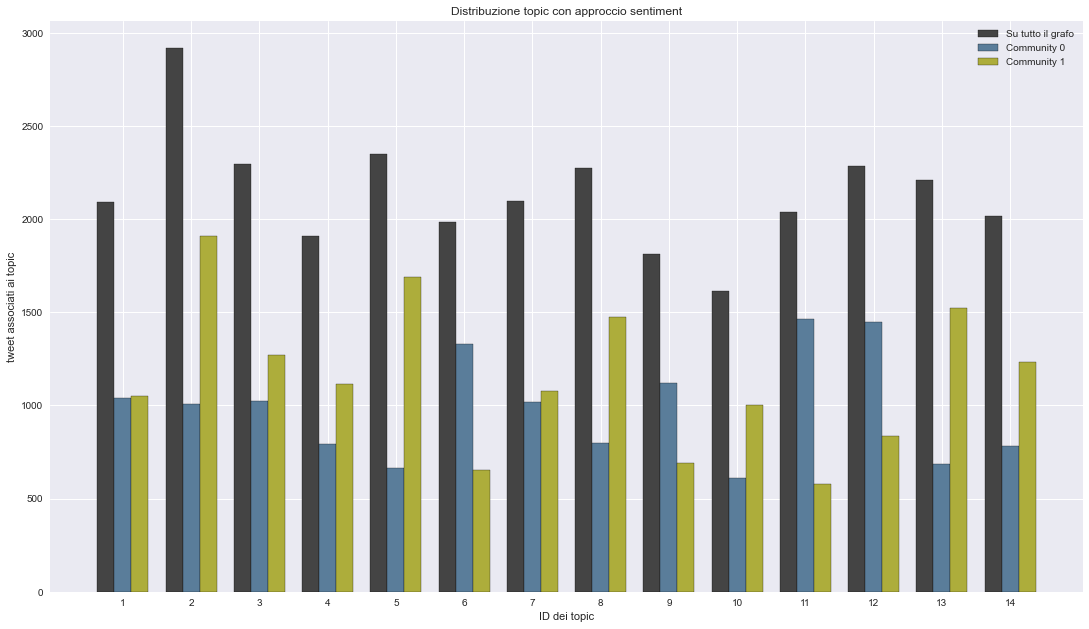

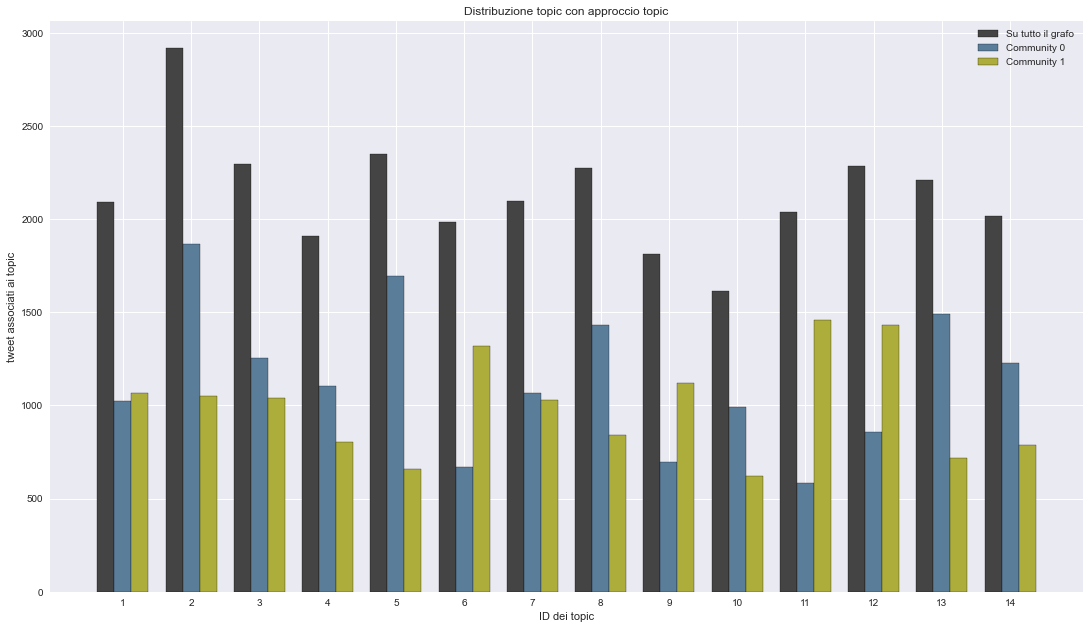

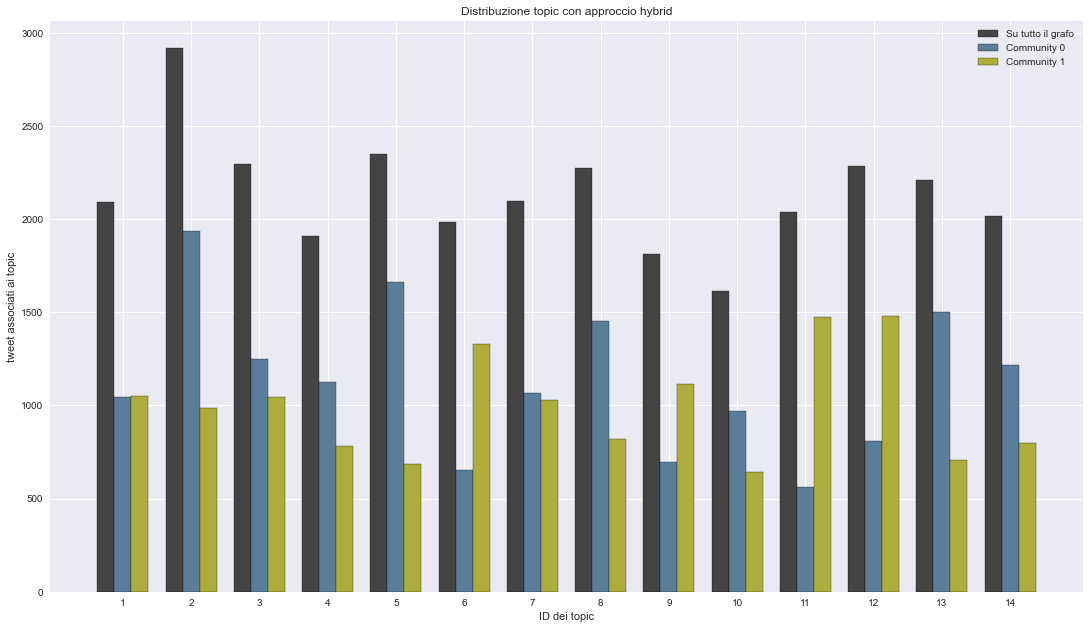

In [54]:
topic_distribution(vaccination_df, 'Vaccination')